In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.duplicated().sum()

0

In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace =True)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [22]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled= sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

In [29]:
X_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [31]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model = Sequential()

model.add(Dense(5, activation='sigmoid', input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [57]:
model.fit(X_train_scaled,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8371 - loss: 0.4040 - val_accuracy: 0.8406 - val_loss: 0.3900
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 0.3984 - val_accuracy: 0.8406 - val_loss: 0.3902
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8337 - loss: 0.4117 - val_accuracy: 0.8406 - val_loss: 0.3902
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8309 - loss: 0.4155 - val_accuracy: 0.8406 - val_loss: 0.3903
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8265 - loss: 0.4105 - val_accuracy: 0.8400 - val_loss: 0.3903
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8352 - loss: 0.4042 - val_accuracy: 0.8388 - val_loss: 0.3902
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.4117 - val_accuracy: 0.8375 - val_loss: 0.3902
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.4183 - val_accuracy: 0.

In [58]:
model.layers[0].get_weights()

[array([[ 0.02426185,  0.09879525,  0.45235905, -0.06512586,  0.09129209],
        [ 0.409337  , -3.4928112 , -2.378764  , -2.6758292 ,  0.39416626],
        [ 0.52163494, -0.03802921, -0.01846467,  0.03447703, -0.09131668],
        [-0.2259343 ,  0.14800332, -0.23478429, -0.23826955, -0.22707255],
        [ 0.08500784,  0.2123731 ,  0.08248571,  0.07000513, -0.06427842],
        [ 0.59888655, -0.0602254 , -0.42164063,  0.075854  ,  0.06712186],
        [ 1.5422984 , -0.83906394, -0.529239  , -0.55660343,  2.224861  ],
        [-0.242895  ,  0.05073735,  0.2413391 , -0.15629892, -0.2714525 ],
        [-0.70931476, -0.00548646, -0.47777668, -0.4163945 , -0.5480742 ],
        [ 0.14743236,  0.10380962, -0.59773797,  0.31415352, -0.03414651],
        [ 0.5638735 , -0.1168738 ,  0.3057961 ,  0.21807666,  0.9119499 ]],
       dtype=float32),
 array([-0.97775614,  0.6696245 , -0.18650807,  0.08875823, -0.93766725],
       dtype=float32)]

In [59]:
model.layers[1].get_weights()

[array([[-1.0146605],
        [-0.9832894],
        [-1.0770167],
        [-1.2878045],
        [-1.5135417]], dtype=float32),
 array([1.1295663], dtype=float32)]

In [60]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.18062192],
       [0.4811718 ],
       [0.21064185],
       ...,
       [0.14539985],
       [0.18790805],
       [0.3784381 ]], dtype=float32)

In [61]:
y_predict = np.where(y_log>0.5,1,0)
y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8335

In [64]:
model1 = Sequential()

model1.add(Dense(7, activation='relu', input_dim=11))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(1,activation='relu'))

In [65]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130 (520.00 B)

 Trainable params: 130 (520.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
model1.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [82]:
history=model1.fit(X_train_scaled,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8378 - loss: 0.4006 - val_accuracy: 0.8462 - val_loss: 0.4034
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.4022 - val_accuracy: 0.8431 - val_loss: 0.4152
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.4058 - val_accuracy: 0.8475 - val_loss: 0.4047
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.3897 - val_accuracy: 0.8462 - val_loss: 0.4063
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.3938 - val_accuracy: 0.8450 - val_loss: 0.4199
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8322 - loss: 0.4097 - val_accuracy: 0.8469 - val_loss: 0.4105
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.4123 - val_accuracy: 0.8494 - val_loss: 0.4036
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8468 - loss: 0.3856 - val_accu

In [83]:
model1.layers[0].get_weights()

[array([[-0.06126818,  0.00464796,  0.02688047,  0.07705664, -0.02976672,
         -0.12986076,  0.01229846],
        [ 0.64220524,  0.2162013 ,  0.7369545 ,  0.5310539 ,  0.18297286,
          0.3812454 , -0.34822392],
        [ 0.08012985,  0.13969651, -0.0153467 ,  0.01835088,  0.10954449,
         -0.04578882,  0.06362345],
        [-0.3568973 , -0.26197708,  0.12570012,  0.25757286,  0.04852064,
         -0.6008085 , -0.2729845 ],
        [-0.27082226, -0.8402737 , -0.42174792, -0.11818413,  1.0467087 ,
         -0.70758957,  0.02477721],
        [-0.02587065,  0.02583369,  0.06816241,  0.16661114,  0.01965132,
          0.03458802,  0.09244436],
        [ 0.3589826 ,  0.5219734 ,  0.13098034,  0.6234517 , -0.00113383,
         -0.18866317,  0.12105265],
        [ 0.05880266,  0.05398354, -0.09294714,  0.05065712,  0.19154747,
          0.3061177 ,  0.18425228],
        [-0.06563139, -0.23374678,  0.11330409,  0.15059192, -0.12546287,
          0.28204674, -0.15088318],
        [ 

In [84]:
model1.layers[1].get_weights()

[array([[-0.07307041,  0.75048566,  0.6637989 , -0.63298094, -0.02858628],
        [-1.5421106 , -0.30953944, -0.24173981, -0.36692008,  0.06227379],
        [ 0.07675517,  0.03797881,  0.18561609,  0.5889922 ,  0.0795313 ],
        [ 0.3940811 ,  0.25772157, -1.5972619 ,  0.02239803, -0.08117137],
        [-0.10925548,  0.06666772, -0.02568979,  0.68773675, -0.10688769],
        [ 0.36558887,  0.02465828,  0.10525507, -0.00276835,  0.5101435 ],
        [ 0.10979363,  0.30223152,  0.27563566, -0.34721553, -0.47508797]],
       dtype=float32),
 array([-0.07451425, -0.10588308, -0.10323454, -0.09335904,  0.06325968],
       dtype=float32)]

In [85]:
model1.layers[2].get_weights()

[array([[-0.4432308 ],
        [-0.46195891],
        [ 0.6589307 ],
        [ 0.6507878 ],
        [ 0.5198107 ]], dtype=float32),
 array([0.05480625], dtype=float32)]

In [86]:
y_log1 = model1.predict(X_test_scaled)
y_log1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.28042364],
       [0.5418252 ],
       [0.2606181 ],
       ...,
       [0.74240583],
       [0.06082239],
       [0.16376817]], dtype=float32)

In [87]:
y_predict1 = np.where(y_log1>0.5,1,0)
y_predict1

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [88]:
accuracy_score(y_test,y_predict1)

0.862

In [89]:
history.history

{'accuracy': [0.8348437547683716,
  0.8368750214576721,
  0.8356249928474426,
  0.8376562595367432,
  0.8379687666893005,
  0.8409374952316284,
  0.8426562547683716,
  0.8454687595367432,
  0.8501562476158142,
  0.8518750071525574,
  0.8487499952316284,
  0.8512499928474426,
  0.8540624976158142,
  0.8432812690734863,
  0.8451562523841858,
  0.8490625023841858,
  0.8498437404632568,
  0.8426562547683716,
  0.84765625,
  0.8465625047683716,
  0.8475000262260437,
  0.8518750071525574,
  0.8531249761581421,
  0.8548437356948853,
  0.85546875,
  0.8542187213897705,
  0.8559374809265137,
  0.8532812595367432,
  0.8567187786102295,
  0.856249988079071,
  0.8567187786102295,
  0.8587499856948853,
  0.8565624952316284,
  0.8570312261581421,
  0.8540624976158142,
  0.8490625023841858,
  0.8543750047683716,
  0.8575000166893005,
  0.8595312237739563,
  0.8590624928474426,
  0.8587499856948853,
  0.8579687476158142,
  0.8542187213897705,
  0.8557812571525574,
  0.8587499856948853,
  0.85812497138

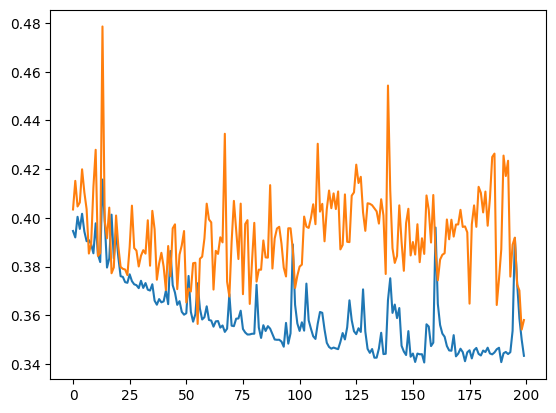

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

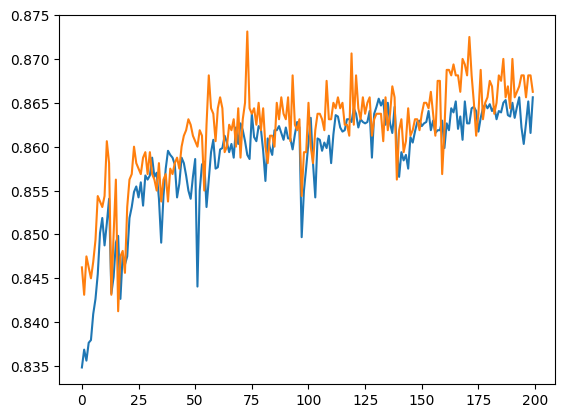

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])